Loading multi-cohort adoption data...


,unit,state,group,unit_fe,g,year,year_fe,treat,rel_year,rel_year_binned,error,te,te_dynamic,dep_var
0,1,33,Group 2,7.043016,2010,1990,0.066159,False,-20.0,-6,-0.086466,0,0.0,7.022709
1,1,33,Group 2,7.043016,2010,1991,-0.030980,False,-19.0,-6,0.766593,0,0.0,7.778628
2,1,33,Group 2,7.043016,2010,1992,-0.119607,False,-18.0,-6,1.512968,0,0.0,8.436377
3,1,33,Group 2,7.043016,2010,1993,0.126321,False,-17.0,-6,0.021870,0,0.0,7.191207
4,1,33,Group 2,7.043016,2010,1994,-0.106921,False,-16.0,-6,-0.017603,0,0.0,6.918492


unit                 int64
state                int64
group               object
unit_fe            float64
g                    int64
year                 int64
year_fe            float64
treat                 bool
rel_year           float64
rel_year_binned      int64
error              float64
te                   int64
te_dynamic         float64
dep_var            float64
dtype: object
Estimating TWFE model...
Estimating Local Projections model...
Preparing TWFE results for plotting...


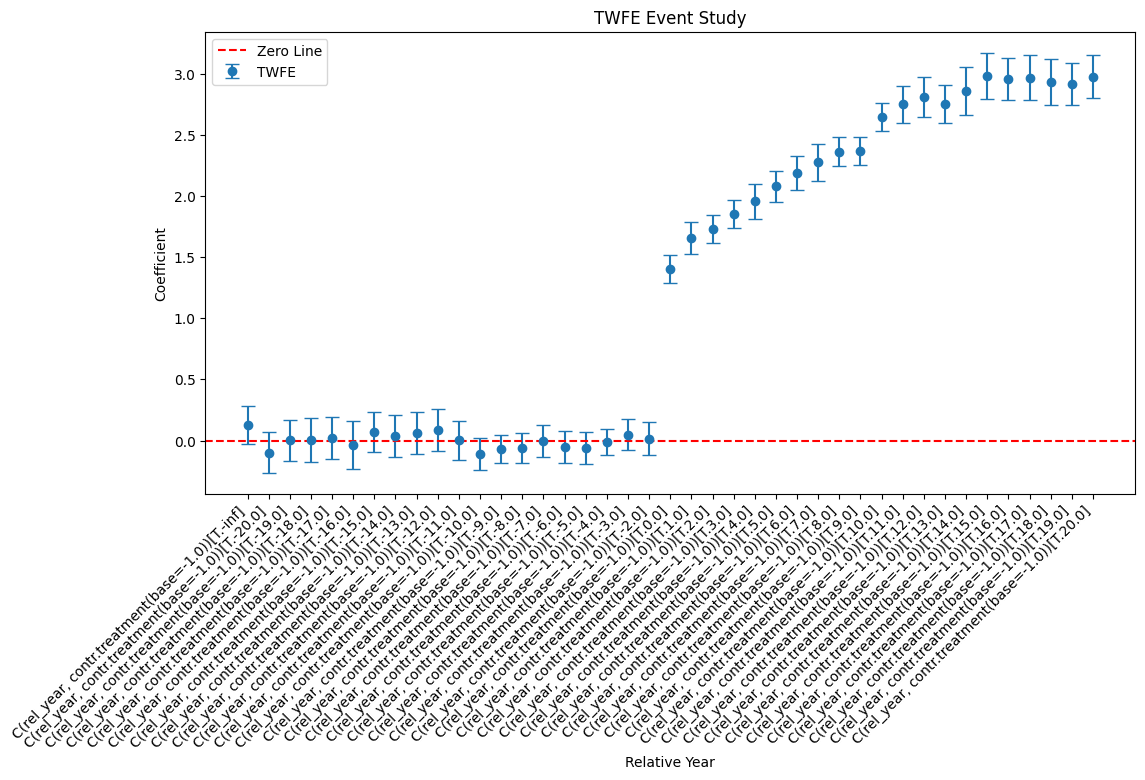

Preparing LPDID results for plotting...


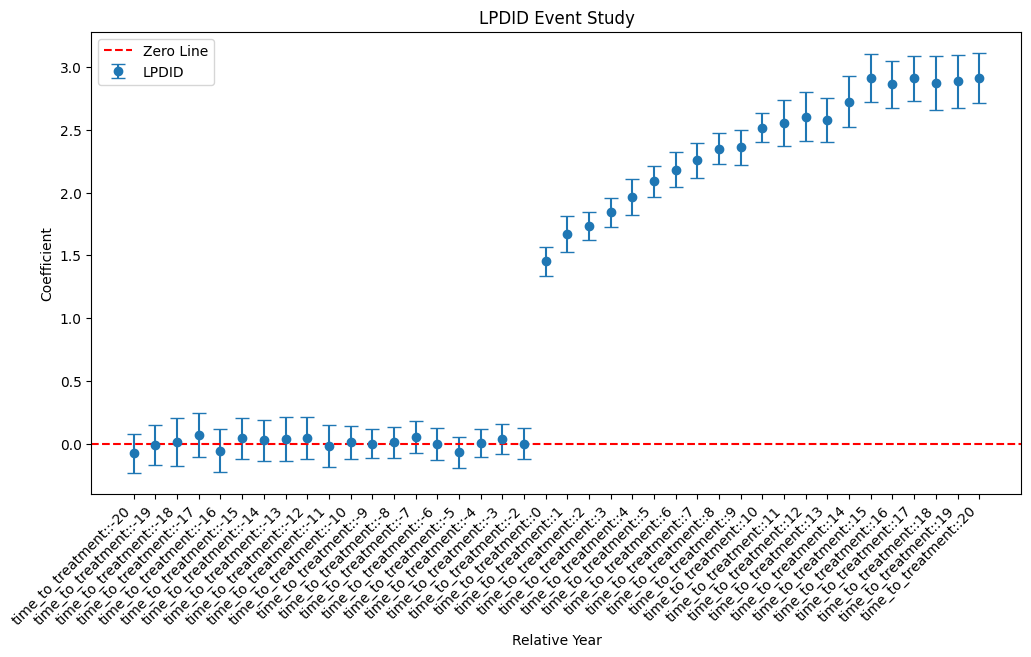

In [8]:
from importlib import resources
import pandas as pd
import pyfixest as pf
import matplotlib.pyplot as plt

# Load multi-cohort adoption data
print("Loading multi-cohort adoption data...")
df_multi_cohort = pd.read_csv(
    resources.files("pyfixest.did.data").joinpath("df_het.csv")
)
display(df_multi_cohort.head())
print(df_multi_cohort.dtypes)

# Two-Way Fixed Effects (TWFE)
print("Estimating TWFE model...")
fit_twfe = pf.feols(
    "dep_var ~ i(rel_year, ref=-1.0) | state + year",
    df_multi_cohort,
    vcov={"CRV1": "state"},
)

# Local Projections (LPDID)
print("Estimating Local Projections model...")
fit_lpdid = pf.lpdid(
    data=df_multi_cohort,
    yname="dep_var",
    gname="g",
    tname="year",
    idname="unit",
    vcov={"CRV1": "state"},
    pre_window=-20,
    post_window=20,
    att=False,
)

# TWFE: Extract coefficients for plotting
print("Preparing TWFE results for plotting...")
twfe_results = fit_twfe.tidy()
twfe_results = twfe_results[
    twfe_results.index.str.contains("C\\(rel_year", regex=True)
]

# Plot TWFE Event Study
plt.figure(figsize=(12, 6))
plt.errorbar(
    twfe_results.index,
    twfe_results["Estimate"],
    yerr=[
        twfe_results["Estimate"] - twfe_results["2.5%"],
        twfe_results["97.5%"] - twfe_results["Estimate"],
    ],
    fmt="o",
    capsize=5,
    label="TWFE",
)
plt.axhline(0, color="red", linestyle="--", label="Zero Line")
plt.xticks(rotation=45, ha="right")
plt.title("TWFE Event Study")
plt.xlabel("Relative Year")
plt.ylabel("Coefficient")
plt.legend()
plt.show()

# LPDID: Extract coefficients for plotting
print("Preparing LPDID results for plotting...")
lpdid_results = fit_lpdid.tidy()
lpdid_results = lpdid_results[
    lpdid_results.index.str.contains("time_to_treatment", regex=True)
]

# Plot LPDID Event Study
plt.figure(figsize=(12, 6))
plt.errorbar(
    lpdid_results.index,
    lpdid_results["Estimate"],
    yerr=[
        lpdid_results["Estimate"] - lpdid_results["2.5%"],
        lpdid_results["97.5%"] - lpdid_results["Estimate"],
    ],
    fmt="o",
    capsize=5,
    label="LPDID",
)
plt.axhline(0, color="red", linestyle="--", label="Zero Line")
plt.xticks(rotation=45, ha="right")
plt.title("LPDID Event Study")
plt.xlabel("Relative Year")
plt.ylabel("Coefficient")
plt.legend()
plt.show()


In [5]:
print("TWFE Coefficient Table:")
print(fit_twfe.tidy())

print("LPDID Coefficient Table:")
print(fit_lpdid.tidy())

TWFE Coefficient Table:
                                                  Estimate  Std. Error  \
Coefficient                                                              
C(rel_year, contr.treatment(base=-1.0))[T.-inf]   0.128053    0.078513   
C(rel_year, contr.treatment(base=-1.0))[T.-20.0] -0.099445    0.081699   
C(rel_year, contr.treatment(base=-1.0))[T.-19.0]  0.000624    0.083213   
C(rel_year, contr.treatment(base=-1.0))[T.-18.0]  0.004125    0.089719   
C(rel_year, contr.treatment(base=-1.0))[T.-17.0]  0.021899    0.085686   
C(rel_year, contr.treatment(base=-1.0))[T.-16.0] -0.036933    0.096921   
C(rel_year, contr.treatment(base=-1.0))[T.-15.0]  0.069578    0.081289   
C(rel_year, contr.treatment(base=-1.0))[T.-14.0]  0.037734    0.086618   
C(rel_year, contr.treatment(base=-1.0))[T.-13.0]  0.061779    0.083362   
C(rel_year, contr.treatment(base=-1.0))[T.-12.0]  0.089913    0.084900   
C(rel_year, contr.treatment(base=-1.0))[T.-11.0]  0.000982    0.079104   
C(rel_year, co